In [1]:
#!pip install yellowbrick

# Gerekli importları yapıyoruz

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Dosya okuma

In [3]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

# EDA yapıyoruz

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df.shape

(18885, 12)

In [7]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
10176,201210,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 1,B,100493
3422,200712,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,9210
843,200602,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Enplaned,Other,International,A,9127
12811,201409,United Airlines,UA,United Airlines,UA,International,Europe,Deplaned,Other,International,G,42992
7734,201101,Lufthansa German Airlines,LH,Lufthansa German Airlines,LH,International,Europe,Deplaned,Other,International,G,17997
17425,201709,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Other,International,G,13816
11115,201306,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,176345
5655,200907,Lufthansa German Airlines,LH,Lufthansa German Airlines,LH,International,Europe,Deplaned,Other,International,G,20107
2051,200612,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Enplaned,Other,International,G,8853
14698,201601,Korean Air Lines,KE,Korean Air Lines,KE,International,Asia,Enplaned,Other,International,A,8766


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


# Eksik verileri temizleme

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

# Verileri numeric hale getirme

In [13]:
# Kategorik sütunları get_dummies ile sayısal hale getirme
categorical_columns = ['Operating Airline', 'Published Airline', 
                       'GEO Summary', 'GEO Region', 'Activity Type Code', 
                       'Price Category Code', 'Terminal']

# Kategorik sütunları sayısal sütunlara dönüştürme
df = pd.get_dummies(df, columns=categorical_columns)


In [14]:
df.head()

,Activity Period,Operating Airline IATA Code,Published Airline IATA Code,Boarding Area,Passenger Count,Operating Airline_ABC Aerolineas S.A. de C.V. dba Interjet,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,...,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Activity Type Code_Thru / Transit,Price Category Code_Low Fare,Price Category Code_Other,Terminal_International,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3
0,200507,TZ,TZ,B,27271,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,200507,TZ,TZ,B,29131,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
2,200507,TZ,TZ,B,5415,False,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,200507,AC,AC,B,35156,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
4,200507,AC,AC,B,34090,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


# Yolcu sayısına göre kümeleme

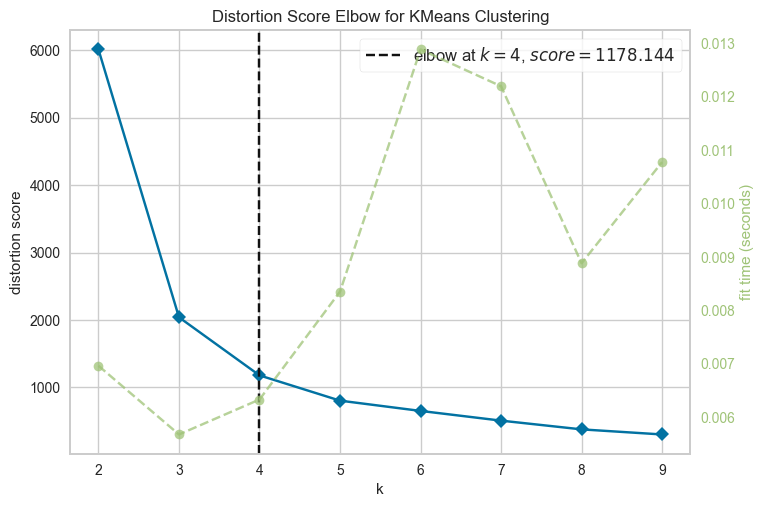

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
X_pass = df[['Passenger Count']]

# Veriyi ölçeklendirelim (standartlaştırma)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans modelini ve Elbow görselleştiricisini tanımlayalım
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

# Elbow görselleştirmesini uygulayalım
visualizer.fit(X_scaled)
visualizer.show()


# Coğrafi Bölgeye Göre Kümeleme

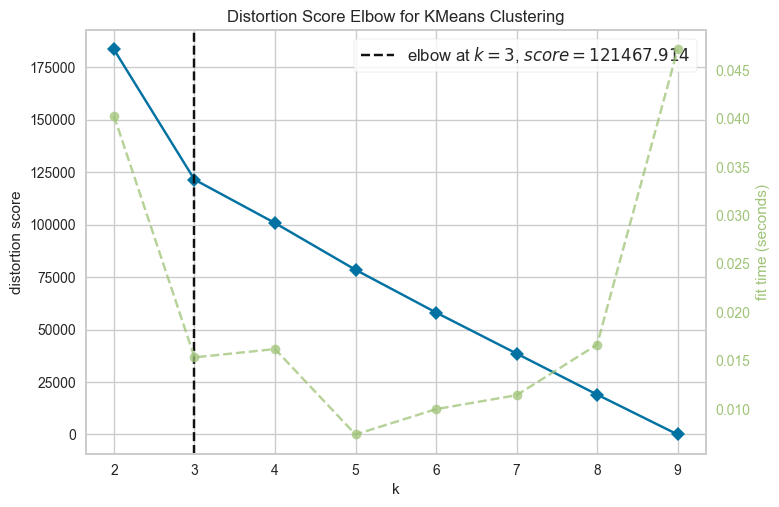

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
X_geo = df.filter(like='GEO Summary').join(df.filter(like='GEO Region'))

# Veriyi ölçeklendirelim (standartlaştırma)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_geo)

# KMeans modelini ve Elbow görselleştiricisini tanımlayalım
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

# Elbow görselleştirmesini uygulayalım
visualizer.fit(X_scaled)
visualizer.show()


# Fiyat Kategorisine Göre Kümeleme

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packa

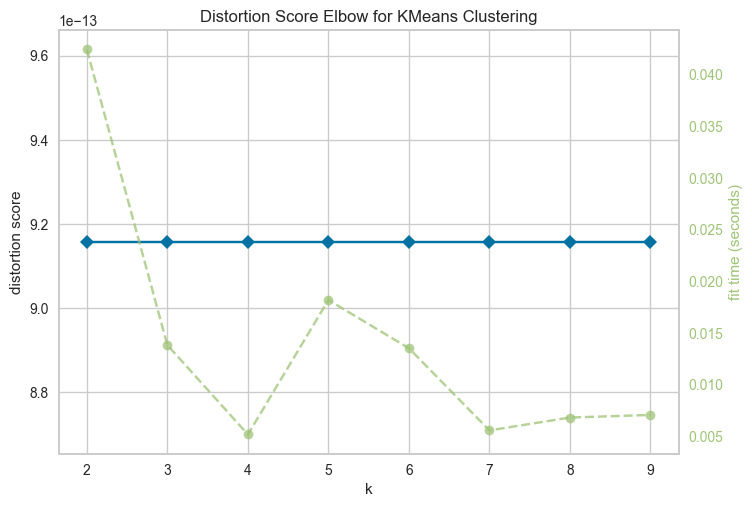

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
X_price = df.filter(like='Price Category Code')

# Veriyi ölçeklendirelim (standartlaştırma)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_price)

# KMeans modelini ve Elbow görselleştiricisini tanımlayalım
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

# Elbow görselleştirmesini uygulayalım
visualizer.fit(X_scaled)
visualizer.show()
